# 나이브베이즈
> 출처 : https://needjarvis.tistory.com/621
## 1. 개념
- 데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률 기반의 분류 방법
- 사건 B가 주어졌을 때 사건 A가 일어날 확률인 P(A|B), 조건부 확률과 베이즈 정리를 이용한 분류기
- 나이브(Naive)
    * 예측 특징이 상호 독립적이라는 가정하에 확률 계산을 단순화
    * 모든 변수들이 동등하다는 것을 의미함
- 베이즈(Bayes)
    * 입력 특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 베이즈 정리를 기반으로 계산

## 2. 장점
- 간단하고 빠르며 효율적인 알고리즘
- 노이즈와 누락 데이터를 잘 처리함
- 훈련을 할 때 데이터의 크기에 상관 없이 잘 동작함
- 예측을 위한 추정 확률을 쉽게 얻을 수 있음

## 3. 단점
- 모든 특징이 동등하게 중요하고, 독립이라는 가정이 잘못된 경우가 자주 있음 (ex: 텍스트의 단어들, 일기예보를 할 때 습도와 같은 중요한 특징을 다른 특징과 동등하다 판단)
- 수치 특징이 많은 데이터셋에는 이상적이지 않음 
- 추정된 확률이 예측된 클래스보다 신뢰도 적음

## 4. 나이브베이즈 보정
- 라플라스 스무딩(Laplace Smoothing)
    * 훈련에 주로 사용된 데이터가 들어왔을 땐 분류기가 잘 작동하지만, 훈련 데이터에 없던 값이 들어오거나 이상값이 들어올 경우 그에 대한 우도가 0이 되어, 정상적인 분류가 되지 않을 때 
    * 가중치 α(주로 0.5 또는 1)를 이용하여 스무딩의 정도를 정하고, 라플라스 스무딩을 이용하면 이제 특정 특징 X에 대한 우도가 0이 될 일이 없도록 함
- 언더플로우(Underflow) 현상
    * 확률이라는 것은 항상 1보다 작은 값을 갖고 나이브 베이즈는 이 모든 확률들을 곱하기 때문에 조건부 확률이 너무 작아져서 비교가 불가능한 현상이 발생
    * 이를 방지하기 위해 값에다 로그를 취한 후 연산을 적용







### [실습] 나이브베이즈

In [1]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
import numpy as np

#데이터셋 로딩
X,y = load_iris(return_X_y=True)

#학습 & 검증용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#가우시안 나이브베이즈 모델 생성 및 학습 & 예측
nb = GaussianNB()
y_pred = nb.fit(X_train, y_train).predict(X_test)

print("학습용:", nb.score(X_train, y_train))
print("검증용:", nb.score(X_test, y_test))
print("검증용:", np.mean(y_pred == y_test))


학습용: 0.9733333333333334
검증용: 0.9466666666666667
검증용: 0.9466666666666667


In [3]:
# Confusion Matrix 출력
from sklearn.metrics import confusion_matrix
pred = nb.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[21,  0,  0],
       [ 0, 30,  0],
       [ 0,  4, 20]])

In [5]:
import pandas as pd
df_cm = pd.DataFrame(cm, index=[0,1,2], columns=[0,1,2])
df_cm

,0,1,2
0,21,0,0
1,0,30,0
2,0,4,20


<AxesSubplot:title={'center':'Confusion Matrix'}>

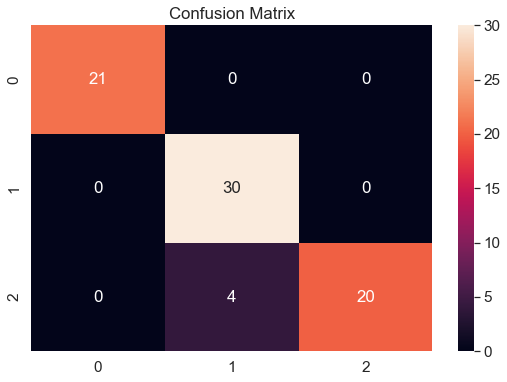

In [6]:
# heatmap 그리기
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9, 6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")